In [2]:
import pandas as pd
import numpy as np

In [3]:
meals = pd.read_csv('meals_final_clean.csv')
meals

,participant_id,diabetic_status,time,Meal Type,Calories,Carbs,Protein,Fat,Fiber,Amount Consumed,...,LDL (Cal),VLDL (Cal),Cho/HDL Ratio,Collection time PDL (Lab),#1 Contour Fingerstick GLU,Time (t),#2 Contour Fingerstick GLU,Time (t).1,#3 Contour Fingerstick GLU,Time (t).2
0,21,Non-Diabetic,2020-06-08 13:00:00,lunch,1180.0,81.0,88.0,54.5,18.0,1.0,...,115,13,3.5,7:48:00 AM,96,7:57,82,9:25,92,10:24
1,21,Non-Diabetic,2020-06-08 19:55:00,dinner,277.0,46.0,4.0,8.0,6.0,3.0,...,115,13,3.5,7:48:00 AM,96,7:57,82,9:25,92,10:24
2,21,Non-Diabetic,2020-06-09 05:53:00,breakfast,448.0,66.0,22.0,10.5,0.0,1.0,...,115,13,3.5,7:48:00 AM,96,7:57,82,9:25,92,10:24
3,21,Non-Diabetic,2020-06-09 12:29:00,lunch,830.0,92.0,17.0,42.0,10.0,1.0,...,115,13,3.5,7:48:00 AM,96,7:57,82,9:25,92,10:24
4,21,Non-Diabetic,2020-06-09 16:18:00,snack,185.0,46.0,4.0,0.0,9.0,1.0,...,115,13,3.5,7:48:00 AM,96,7:57,82,9:25,92,10:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,38,Type 2 Diabetic,2022-02-03 07:17:00,breakfast,268.0,24.0,22.0,10.5,0.0,100.0,...,80,49,4.8,7:13:00 AM,150,7:35,175,8:35,186,9:41
1702,38,Type 2 Diabetic,2022-02-03 11:03:00,lunch,725.0,94.0,44.0,20.0,4.0,100.0,...,80,49,4.8,7:13:00 AM,150,7:35,175,8:35,186,9:41
1703,38,Type 2 Diabetic,2022-02-03 13:41:00,dinner,0.0,0.0,0.0,0.0,0.0,0.0,...,80,49,4.8,7:13:00 AM,150,7:35,175,8:35,186,9:41
1704,38,Type 2 Diabetic,2022-02-03 16:39:00,dinner,277.0,55.0,11.0,1.0,2.0,100.0,...,80,49,4.8,7:13:00 AM,150,7:35,175,8:35,186,9:41


In [21]:
# First, get unique participant-diabetic_status pairs
participant_status = meals[['participant_id', 'diabetic_status']].drop_duplicates()

# Create meal averages and merge with diabetic status
meal_averages = meals.groupby(
    ['participant_id', 'Meal Type']
    )[['Carbs', 'Protein', 'Fat', 'spike']].mean().reset_index()

meal_averages = meal_averages.merge(participant_status, on='participant_id')
meal_averages

meal_averages.to_csv('meal_averages.csv')

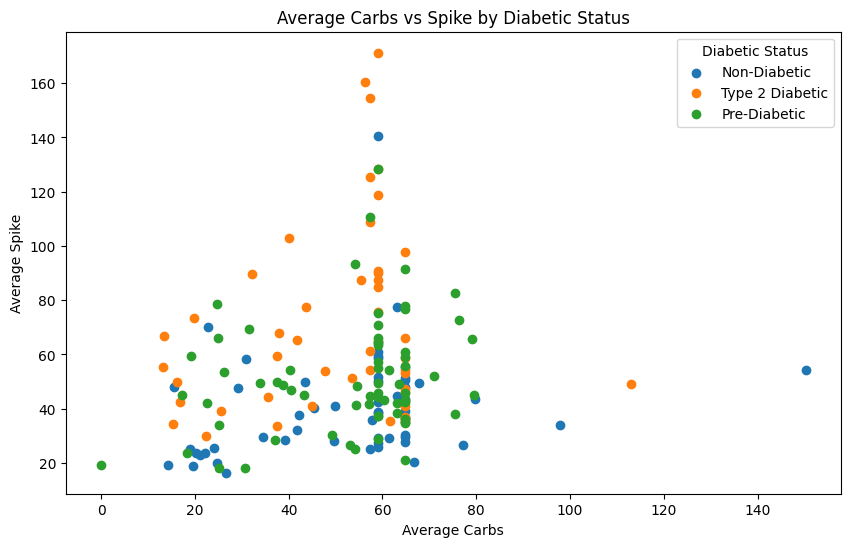

In [ ]:
## scatter plot for Carbs vs spike for all 1706 rows

import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(10, 6))

# Get unique diabetic status values
status_values = meal_averages['diabetic_status'].unique()

# Plot each diabetic status with different colors
for status in status_values:
    mask = meal_averages['diabetic_status'] == status
    plt.scatter(meal_averages[mask]['Carbs'], 
                meal_averages[mask]['spike'], 
                label=status)

# Customize the plot
plt.title('Average Carbs vs Spike by Diabetic Status')
plt.xlabel('Average Carbs')
plt.ylabel('Average Spike')
plt.legend(title='Diabetic Status')

# Show the plot
plt.show()

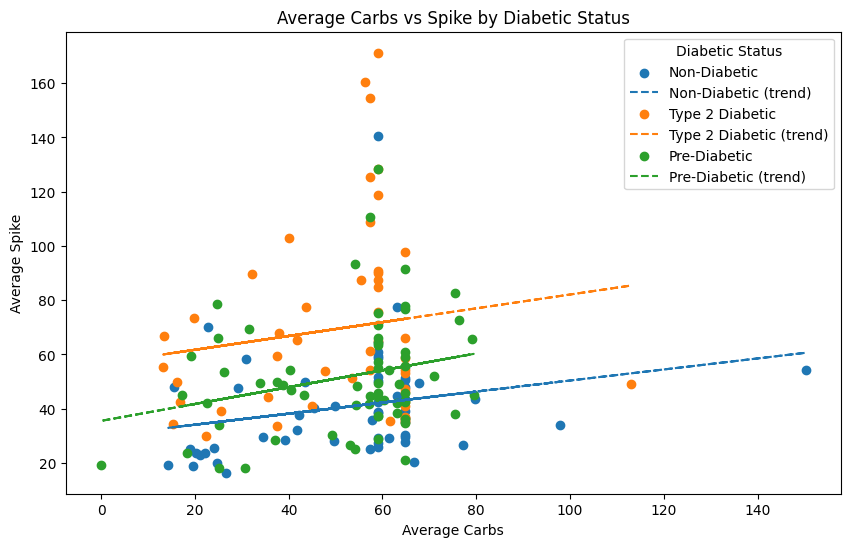

In [18]:
import numpy as np
from scipy import stats

# Create figure
plt.figure(figsize=(10, 6))

# Get unique diabetic status values
status_values = meal_averages['diabetic_status'].unique()

# Plot each diabetic status with different colors and add regression line
for status in status_values:
    mask = meal_averages['diabetic_status'] == status
    data = meal_averages[mask]
    
    # Scatter plot
    plt.scatter(data['Carbs'], data['spike'], label=status)
    
    # Calculate and plot regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Carbs'], data['spike'])
    line = slope * data['Carbs'] + intercept
    plt.plot(data['Carbs'], line, '--', label=f'{status} (trend)')

# Customize the plot
plt.title('Average Carbs vs Spike by Diabetic Status')
plt.xlabel('Average Carbs')
plt.ylabel('Average Spike')
plt.legend(title='Diabetic Status')

# Show the plot
plt.show()

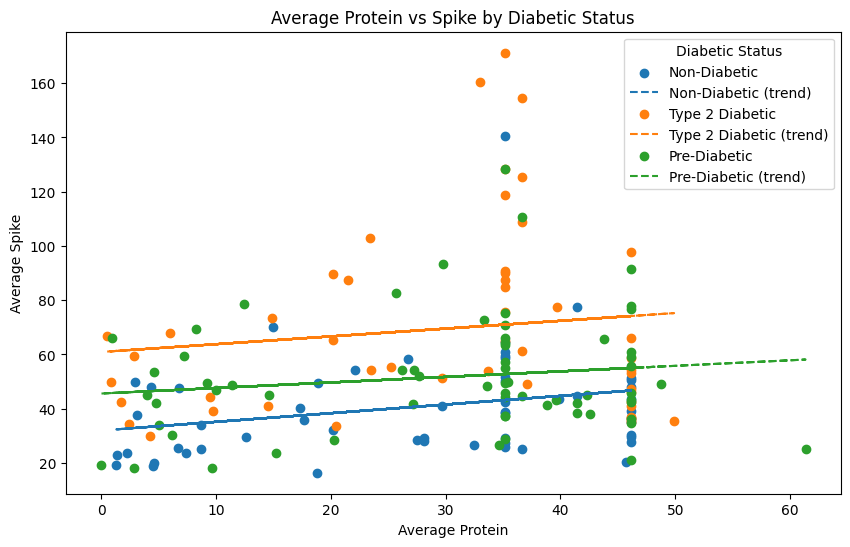

In [19]:
## scatter plot for protein vs spike
import numpy as np
from scipy import stats

# Create figure
plt.figure(figsize=(10, 6))

# Get unique diabetic status values
status_values = meal_averages['diabetic_status'].unique()

# Plot each diabetic status with different colors and add regression line
for status in status_values:
    mask = meal_averages['diabetic_status'] == status
    data = meal_averages[mask]
    
    # Scatter plot
    plt.scatter(data['Protein'], data['spike'], label=status)
    
    # Calculate and plot regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Protein'], data['spike'])
    line = slope * data['Protein'] + intercept
    plt.plot(data['Protein'], line, '--', label=f'{status} (trend)')

# Customize the plot
plt.title('Average Protein vs Spike by Diabetic Status')
plt.xlabel('Average Protein')
plt.ylabel('Average Spike')
plt.legend(title='Diabetic Status')

# Show the plot
plt.show()

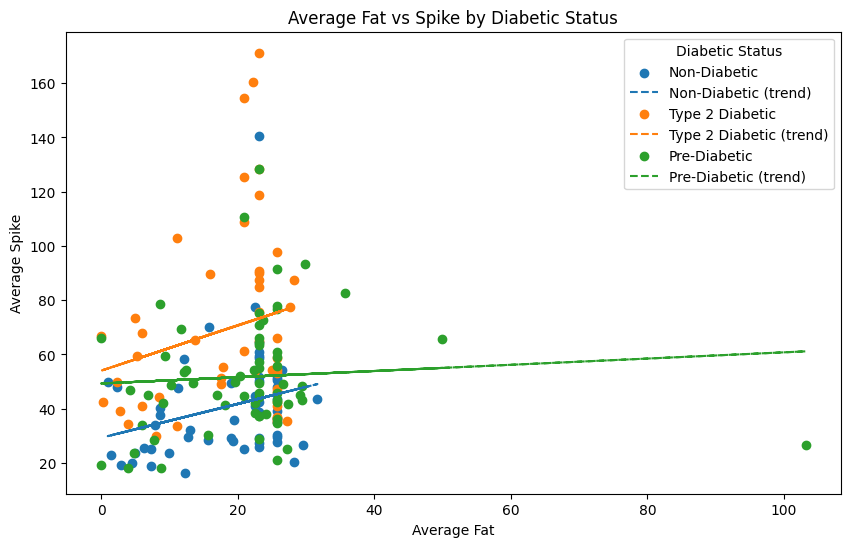

In [20]:
## scatter plot for fat vs spike
import numpy as np
from scipy import stats

# Create figure
plt.figure(figsize=(10, 6))

# Get unique diabetic status values
status_values = meal_averages['diabetic_status'].unique()

# Plot each diabetic status with different colors and add regression line
for status in status_values:
    mask = meal_averages['diabetic_status'] == status
    data = meal_averages[mask]
    
    # Scatter plot
    plt.scatter(data['Fat'], data['spike'], label=status)
    
    # Calculate and plot regression line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Fat'], data['spike'])
    line = slope * data['Fat'] + intercept
    plt.plot(data['Fat'], line, '--', label=f'{status} (trend)')

# Customize the plot
plt.title('Average Fat vs Spike by Diabetic Status')
plt.xlabel('Average Fat')
plt.ylabel('Average Spike')
plt.legend(title='Diabetic Status')

# Show the plot
plt.show()